In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Teacher_df = pd.read_csv('G:/fTDATA.csv',header=None,engine='python')

      0                      1                2
0  6278        Akhil chaurasia  CLOUD COMPUTING
1  7231         Jaspreet Singh  CLOUD COMPUTING
2  6845  Gagangeet Singh Aujla  CLOUD COMPUTING
3  6222        Prabhneet Singh  CLOUD COMPUTING
4  7347    Navpreet Kaur Walia  CLOUD COMPUTING


In [3]:
ratings_df = pd.read_csv('G:/fSDATA.csv',header=None,engine='python')
print(ratings_df.head())

      0     1    2
0  1001  6278  4.3
1  1001  7231  2.4
2  1001  6845  3.6
3  1001  6222  5.0
4  1001  7347  1.2


In [4]:
Teacher_df.columns = ['TID','TName','Technology']
ratings_df.columns = ['SID','TID','Rating']

In [5]:
print(Teacher_df.head())
print(ratings_df.head())

    TID                  TName       Technology
0  6278        Akhil chaurasia  CLOUD COMPUTING
1  7231         Jaspreet Singh  CLOUD COMPUTING
2  6845  Gagangeet Singh Aujla  CLOUD COMPUTING
3  6222        Prabhneet Singh  CLOUD COMPUTING
4  7347    Navpreet Kaur Walia  CLOUD COMPUTING
    SID   TID  Rating
0  1001  6278     4.3
1  1001  7231     2.4
2  1001  6845     3.6
3  1001  6222     5.0
4  1001  7347     1.2


In [6]:
print("The number of teachers in the dataset are: ",len(Teacher_df))

The number of teachers in the dataset are:  119


In [7]:
Teacher_df['List Index'] = Teacher_df.index

In [8]:
print(Teacher_df.head())

    TID                  TName       Technology  List Index
0  6278        Akhil chaurasia  CLOUD COMPUTING           0
1  7231         Jaspreet Singh  CLOUD COMPUTING           1
2  6845  Gagangeet Singh Aujla  CLOUD COMPUTING           2
3  6222        Prabhneet Singh  CLOUD COMPUTING           3
4  7347    Navpreet Kaur Walia  CLOUD COMPUTING           4


In [9]:
merged_df = Teacher_df.merge(ratings_df,on='TID')

In [10]:
merged_df = merged_df.drop('TName',axis=1).drop('Technology',axis=1)

In [11]:
print(merged_df.head())

    TID  List Index   SID  Rating
0  6278           0  1001     4.3
1  6278           0  1012     4.3
2  6278           0  1022     4.3
3  6278           0  1036     4.3
4  7231           1  1001     2.4


In [12]:
user_Group = merged_df.groupby('SID')

In [13]:
print(user_Group.head())

      TID  List Index   SID  Rating
0    6278           0  1001    4.30
1    6278           0  1012    4.30
2    6278           0  1022    4.30
3    6278           0  1036    4.30
4    7231           1  1001    2.40
5    7231           1  1012    2.40
6    7231           1  1022    2.40
7    7231           1  1036    2.40
8    6845           2  1001    3.60
9    6845           2  1010    0.00
10   6845           2  1012    3.60
11   6845           2  1020    0.00
12   6845           2  1022    3.60
13   6845           2  1032    0.00
14   6845           2  1036    3.60
15   6845           2  1045    0.00
16   6222           3  1001    5.00
17   6222           3  1010    2.60
18   6222           3  1012    5.00
19   6222           3  1020    2.60
20   6222           3  1022    5.00
21   6222           3  1032    2.60
22   6222           3  1036    5.00
23   6222           3  1045    2.60
24   7347           4  1001    1.20
25   7347           4  1010    3.40
26   7347           4  1012 

In [16]:
amountOfUsedUsers = 1000

In [17]:
trX = []

In [18]:
for userID, curUser in user_Group:
    temp = [0]*len(Teacher_df)
    for num,teacher in curUser.iterrows():
        #print(movie)
        temp[int(teacher['List Index'])] = teacher['Rating']/5.0
    trX.append(temp)
    if(amountOfUsedUsers==0):
        break
    amountOfUsedUsers -= 1


In [22]:
import random
random.shuffle(trX)
train = trX[:30]
valid = trX[30:]

In [23]:
hiddenUnits = 50

In [39]:
VisibleUnits = len(Teacher_df)

In [40]:
vb = tf.placeholder(tf.float32, [VisibleUnits])
hb = tf.placeholder(tf.float32, [hiddenUnits])
W = tf.placeholder(tf.float32, [VisibleUnits, hiddenUnits])

In [41]:
v0 = tf.placeholder("float", [None,VisibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0,W)+hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

In [42]:
_v1 = tf.nn.sigmoid(tf.matmul(h0,tf.transpose(W))+vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1,W)+hb)

In [43]:
alpha = 0.6

In [44]:
w_pos_grad = tf.matmul(tf.transpose(v0),h0)
w_neg_grad = tf.matmul(tf.transpose(v1),h1)

In [45]:
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

In [46]:
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [47]:
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

In [48]:
cur_w = np.random.normal(loc=0, scale=0.01,size=[VisibleUnits, hiddenUnits])
cur_vb = np.zeros([VisibleUnits], np.float32)
cur_hb = np.zeros([hiddenUnits], np.float32)
prv_w = np.zeros([VisibleUnits, hiddenUnits], np.float32)
prv_vb = np.zeros([VisibleUnits], np.float32)
prv_hb = np.zeros([hiddenUnits], np.float32)

In [49]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

In [50]:
def free_energy(v_sample, W, vb, hb):
    wx_b = np.dot(v_sample, W)+hb
    vbias_term = np.dot(v_sample, vb)
    hidden_term = np.sum(np.log(1+np.exp(wx_b)),axis=1)
    return -hidden_term-vbias_term

In [53]:
epochs = 60
batchsize = 100
errors = []
energy_train = []
energy_valid = []
for i in range(epochs):
    for start, end in zip(range(0,len(train), batchsize), range(batchsize, len(train), batchsize)):
        batch = train[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    energy_train.append(np.mean(free_energy(train,cur_w,cur_vb,cur_hb)))
    energy_valid.append(np.mean(free_energy(valid,cur_w,cur_vb,cur_hb)))
    errors.append(sess.run(err_sum, feed_dict={v0: train, W: cur_w, vb: cur_vb, hb: cur_hb}))
    if i%10==0:
        print("Error in epoch {0} is: {1}".format(i,errors[i]))

Error in epoch 0 is: 0.47986504435539246
Error in epoch 10 is: 0.4825865626335144
Error in epoch 20 is: 0.4698145389556885
Error in epoch 30 is: 0.48996132612228394
Error in epoch 40 is: 0.4775512218475342
Error in epoch 50 is: 0.47783806920051575


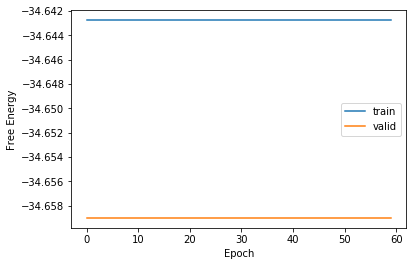

In [54]:
fig, ax = plt.subplots()
ax.plot(energy_train, label = 'train')
ax.plot(energy_valid, label = 'valid')
leg = ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Free Energy")
plt.show()

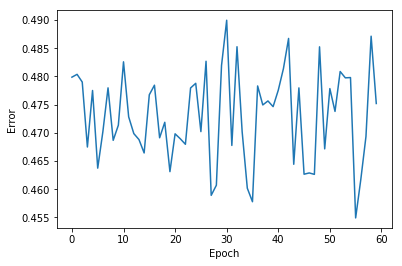

In [55]:
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

In [56]:
inputUser = [train[22]]

In [57]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})

In [60]:
scored_teacher_df_50 = Teacher_df
scored_teacher_df_50["Recommendation Score"] = rec[0]
print(scored_teacher_df_50.sort_values(["Recommendation Score"], ascending=False).head(20))

     TID                TName  \
0   6278      Akhil chaurasia   
75  5916     Anuja Srivastava   
87  7160                 Riya   
86  7288             Dupinder   
85  6199       Ravinder Saini   
84  6201             abhishek   
83  5197  Sushil kumar mishra   
82  7382              Vasudha   
81  7773       Simarjeet Kaur   
80  6913          Puneet kaur   
79  4911            ANNUPRIYA   
78  6227     charanpreet kaur   
77  2899          Vijay kumar   
76  6129       gurpreet singh   
74  4927         Jagtar Singh   
89  2032       GEETIKA SHARMA   
73  5002    Vijay Kumar Singh   
72  4952           Deepshikha   
71  1609        Sanjay Madaan   
70  6234       Shanvendra Rai   

                                           Technology  List Index  \
0                                     CLOUD COMPUTING           0   
75                                          JAVA| JSP          75   
87                                   NETWORK SECURITY          87   
86                            

In [61]:
print(merged_df.iloc[50])

TID           4879.00
List Index       6.00
SID           1036.00
Rating           3.33
Name: 50, dtype: float64


In [65]:
teacher_df_50 = merged_df[merged_df['SID']==1012]
print(teacher_df_50.head())

     TID  List Index   SID  Rating
1   6278           0  1012     4.3
5   7231           1  1012     2.4
10  6845           2  1012     3.6
18  6222           3  1012     5.0
26  7347           4  1012     1.2


In [67]:
merged_df_50 = scored_teacher_df_50.merge(teacher_df_50, on='TID', how='outer')
merged_df_50 = merged_df_50.drop('List Index_y', axis=1).drop('SID', axis=1)

In [68]:
print(merged_df_50.sort_values(['Recommendation Score'], ascending=False).head(20))

     TID                TName  \
0   6278      Akhil chaurasia   
75  5916     Anuja Srivastava   
87  7160                 Riya   
86  7288             Dupinder   
85  6199       Ravinder Saini   
84  6201             abhishek   
83  5197  Sushil kumar mishra   
82  7382              Vasudha   
81  7773       Simarjeet Kaur   
80  6913          Puneet kaur   
79  4911            ANNUPRIYA   
78  6227     charanpreet kaur   
77  2899          Vijay kumar   
76  6129       gurpreet singh   
74  4927         Jagtar Singh   
89  2032       GEETIKA SHARMA   
73  5002    Vijay Kumar Singh   
72  4952           Deepshikha   
71  1609        Sanjay Madaan   
70  6234       Shanvendra Rai   

                                           Technology  List Index_x  \
0                                     CLOUD COMPUTING             0   
75                                          JAVA| JSP            75   
87                                   NETWORK SECURITY            87   
86                    